# A project of Rodolfo Petrelli, Alberto Gallino, Matteo Conterno and Matteo Ling

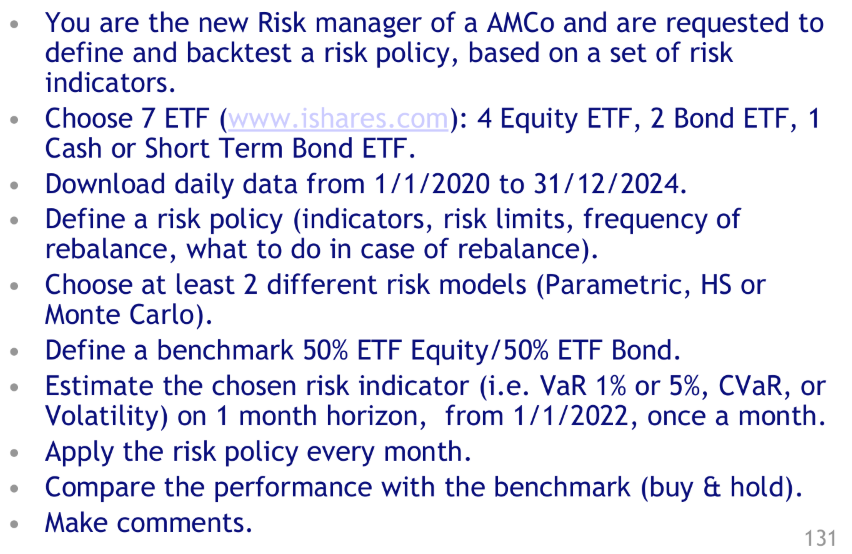

In the first part of the project we upload the ETF price dataset with the seven ETFs required (4 Equity ETF, 2 Bond ETF and 1 Short Term Bond ETF). The ETFs are:


*   **AGG** – iShares Core U.S. Aggregate Bond ETF:<br>
    it seeks to track the investment results of an index composed of the total U.S investment grade bond market.Broad exposure-Low cost-Diversification)
*   **IEMG** – iShares Core MSCI Emerging Markets ETF<br>
    it seeks to track the investment results of an index composed of large-mid and small capitalization emerging market equities (China, India etc). Equity-Broad range exposure- Low cost-Long-term growth(high risk)
*   **IJH** – iShares Core S&P Mid-Cap ETF:<br>
    equity ETF that measures the performance of the mid-capitalization sector of the U.S equity market (SPDJI).Medium-high risk
*   **IVV** – iShares Core S&P 500 ETF:<br>
    equity ETF that seeks to track the S&P500.Exposure to the largest U.S stocks-Target long-term growth-Medium risk with stable growth but exposed to market cycles.    
*   **IWF** – iShares Russell 1000 Growth ETF:<br>
    tracks investment results of an index composed of large and mid capitalization U.S equities that exibit growth characteristics.Medium-high risk
*   **LQD** – iShares iBoxx $ Investment Grade Corporate Bond ETF:<br>
    bond ETF holding investment-grade corporate bonds.Used to seek stability and pursue income. Low-medium risk (credit risk).
*   **SHV** – iShares Short Treasury Bond ETF:<br>
    seeks to track the investment results of an index composed of U.S Treasury Bonds maturing in less than one year. It allows a targeted access to a specific segment of the U.S Trasury market. Very low risk for liquidity purpose.















In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import t
from scipy.optimize import minimize
from matplotlib.dates import DateFormatter

Load datset

In [ ]:
# mount to access content
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load CSV
path = "/content/drive/MyDrive/Colab Notebooks/ETF_data_risk.csv"#"/content/drive/MyDrive/ETF_data (1).csv"
# path = "/content/drive/MyDrive/Risk_dataset/ETF_data_risk.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Close,Close.1,Close.2,Close.3,Close.4,Close.5,Close.6,High,High.1,...,Open.4,Open.5,Open.6,Volume,Volume.1,Volume.2,Volume.3,Volume.4,Volume.5,Volume.6
0,Date,AGG,IEMG,IJH,IVV,IWF,LQD,SHV,AGG,IEMG,...,IWF,LQD,SHV,AGG,IEMG,IJH,IVV,IWF,LQD,SHV
1,02/01/20,98.52736664,47.88603591918945,38.22584533691406,301.8692321777344,172.20867919921875,108.13484954833984,97.75611114501953,98.63229701250073,47.88603591918945,...,171.06930380867905,108.22761177127452,97.73841075,6791400,17375000,8788500,4070500,1676600,15348700,1896100
2,03/01/20,98.81592559814453,47.03950881958008,38.03298568725586,299.5473327636719,170.96310424804688,108.50586700439453,97.75611114501953,98.85090239150696,47.32750407303913,...,170.03616918945215,108.27817563814614,97.75611114501953,3664300,9527300,5156000,4290400,2040100,10110900,1491000
3,06/01/20,98.73725128173828,46.86496353149414,38.02185059,300.7314147949219,172.05418395996094,108.14330291748047,97.74726867675781,98.92087449028182,46.90859877149701,...,169.8044137249605,108.52278010245524,97.76496232409055,8131600,9825900,6657000,4212000,2459700,13894300,1465500
4,07/01/20,98.63234711,46.86496353149414,37.92357635498047,299.9080505371094,171.69692993164062,107.8649902,97.76493835449219,98.73727086339966,46.93477924966765,...,171.9093408681661,108.08424052081024,97.75609490835598,2883000,5812500,4360000,3632500,1336200,8211700,1370300


,AGG,IEMG,IJH,IVV,IWF,LQD,SHV
Date,,,,,,,
2020-01-02,98.527367,47.886036,38.225845,301.869232,172.208679,108.134850,97.756111
2020-01-03,98.815926,47.039509,38.032986,299.547333,170.963104,108.505867,97.756111
2020-01-06,98.737251,46.864964,38.021851,300.731415,172.054184,108.143303,97.747269
2020-01-07,98.632347,46.864964,37.923576,299.908051,171.696930,107.864990,97.764938
2020-01-08,98.518646,47.056961,37.982906,301.434418,173.116302,107.713203,97.773811
...,...,...,...,...,...,...,...
2024-12-23,96.340446,52.980000,62.520000,597.640015,411.450012,106.283859,109.588890
2024-12-24,96.450081,53.130001,62.990002,604.359985,416.739990,106.612663,109.618782
2024-12-26,96.519844,52.950001,63.230000,604.070007,416.119995,106.712303,109.638718


<Figure size 1200x600 with 0 Axes>

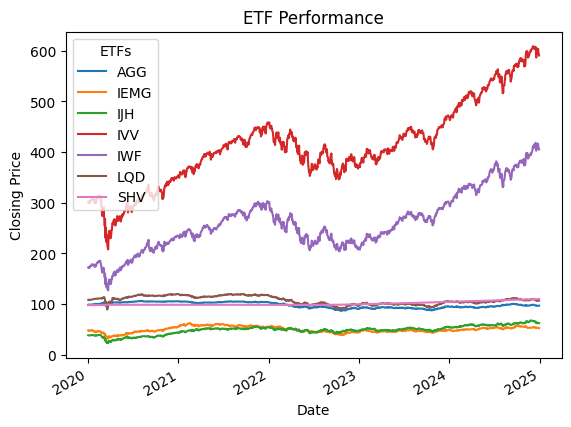

In [ ]:
# Extract 'Close' columns and Date
close_columns = [col for col in df.columns if "Close" in col]
df_close = df[["Unnamed: 0"] + close_columns]

# Set the first row as header and reset DataFrame
df_close.columns = df_close.iloc[0]
df_close = df_close[1:].reset_index(drop=True)

# Rename 'Unnamed: 0' to 'Date'
df_close.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
df_close["Date"] = pd.to_datetime(df_close["Date"], format="%d/%m/%y")

# Convert all columns to float
numeric_columns = df_close.columns[1:]
df_close[numeric_columns] = df_close[numeric_columns].astype("float64")
df_close.set_index("Date", inplace = True)

display(df_close)

# Closing price plot
plt.figure(figsize=(12, 6))
ax = df_close.plot(title="ETF Performance")
ax.set_ylabel("Closing Price")
ax.legend(title="ETFs")
plt.show()

## Before starting to discuss the models an important point

In [ ]:
#compute correlation matrix for pairwise correlation between ETF closing price
corr = df_close.corr()
corr.style.background_gradient(cmap='coolwarm')

0,AGG,IEMG,IJH,IVV,IWF,LQD,SHV
0,,,,,,,
AGG,1.000000,0.463895,-0.306348,-0.301232,-0.170229,0.972698,-0.355607
IEMG,0.463895,1.000000,0.583599,0.474944,0.532173,0.610091,0.132940
IJH,-0.306348,0.583599,1.000000,0.958775,0.922990,-0.129561,0.701389
IVV,-0.301232,0.474944,0.958775,1.000000,0.984393,-0.140364,0.843994
IWF,-0.170229,0.532173,0.922990,0.984393,1.000000,-0.010338,0.845952
LQD,0.972698,0.610091,-0.129561,-0.140364,-0.010338,1.000000,-0.258124
SHV,-0.355607,0.132940,0.701389,0.843994,0.845952,-0.258124,1.000000


In order to assess diversification and risk we can notice high correlation among IJH, IVV and IWF (above 0.9), indicating they are strongly aligned in their market behavior. Some other ETFs instead display a negative correlation like AGG-IWF

## Risky policy definition
In the following code we implement and optimize a portfolio strategy by balancing expected returns, downside and tail risks. As a risk metric we use the Conditional Value at Risk (CvaR) with the threshold set at the 5% quantile.

$$
\text{CVaR}_{\alpha} = \mathbb{E}[R \mid R \leq \text{VaR}_{\alpha}]
$$


Where:<br>

*   $CVaR_\alpha$: The expected return, given that the return is worse than the Value at Risk threshold at the $\alpha$ level
*   $VaR_\alpha$: the quantile of returns below $\alpha$.

We also use downside deviations which penalize much more losses according to the following smooth formula $\sqrt{\hat{X}}$ with $\hat{X} = \sum_{X<0}{X^2}$

In order to simplify the code and reduce runtime we resample on a monthly basis all the dataset and calculate the cumulative return.


In [ ]:
#Create dataset to start
returns = df_close.pct_change().dropna()
monthly_returns_sum = returns.resample("ME").sum()
monthly_returns_sum = monthly_returns_sum.loc["2022-01-31":]
display(monthly_returns_sum)

,AGG,IEMG,IJH,IVV,IWF,LQD,SHV
Date,,,,,,,
2022-01-31,-0.020084,-0.003034,-0.073374,-0.052944,-0.087658,-0.036342,-0.000815
2022-02-28,-0.011362,-0.038896,0.013987,-0.027478,-0.039024,-0.021151,-0.000362
2022-03-31,-0.028215,-0.024300,0.016239,0.039272,0.043386,-0.028661,-0.000363
2022-04-30,-0.038572,-0.059763,-0.071475,-0.089998,-0.125613,-0.068640,-0.000290
2022-05-31,0.007806,0.008985,0.012109,0.007068,-0.016455,0.018973,0.000663
2022-06-30,-0.015268,-0.055070,-0.096942,-0.083230,-0.078078,-0.036174,-0.000752
2022-07-31,0.025275,0.001189,0.105321,0.090171,0.116773,0.043909,0.000882
2022-08-31,-0.030617,-0.011460,-0.030299,-0.040473,-0.045579,-0.044588,0.001281
2022-09-30,-0.041909,-0.118149,-0.093791,-0.094377,-0.099443,-0.060738,0.000282


## The objective function in detail

The first hypothesis that we assumed is that: the weights and returns of the previous month, until the very last day will impact significantly on the previous weights. For this reason we decided to apply the following terms:

- Exponentially Weighted Moving Average (EWMA)
- Downside deviations as previously defined.
- CVAR weighted exponentially in order to exphatize the worst returns occured.

All the terms are used in a lagrangian formulation and are weighed by the lagrangian multiplier.

In [ ]:
def robust_objective(weights, prev_month_returns, alpha=0.05,
                     lambda_return=0.4, lambda_risk=0.3, lambda_tail=0.3):
    """
    Enhanced portfolio optimization objective
    using exponentially weighted recency bias, tail risk and.

    Parameters:
    weights: Portfolio weights vector
    prev_month_returns: Matrix of asset returns from previous month
    alpha: Confidence level for risk measures (default 0.05)
    lambda_return: Weight for return component (default 0.3)
    lambda_risk: Weight for main risk component (default 0.3)
    lambda_tail: Weight for tail risk component (default 0.2)
    """
    # Portfolio returns calculation
    portfolio_returns = prev_month_returns @ weights

    # Exponentially Weighted Moving Average (EWMA)
    num_days = len(portfolio_returns)
    recency_weights = np.exp(np.linspace(-2, 0, num_days))
    recency_weights /= np.sum(recency_weights)
    expected_return = np.sum(portfolio_returns * recency_weights)

    # Downside risk component (penalizes only losses)
    negative_returns = portfolio_returns[portfolio_returns < 0]
    downside_risk = np.sqrt(np.mean(negative_returns**2)) if len(negative_returns) > 0 else 0

    # Tail risk component, CVaR with exponential weighting
    sorted_returns = np.sort(portfolio_returns)
    var_index = max(1, int(alpha * len(sorted_returns)))
    worst_returns = sorted_returns[:var_index]

    # Apply exponential weighting to worst returns
    weights_tail = np.exp(-np.arange(len(worst_returns)))
    weights_tail /= np.sum(weights_tail)
    weighted_cvar = -np.sum(worst_returns * weights_tail)

    # Combined objective (negative because we're minimizing)
    score = -lambda_return * expected_return + \
            lambda_risk * downside_risk + \
            lambda_tail * weighted_cvar

    return score

## Comments on the configuration

Our configuration suppose that you can only go long, the entire capital is invested all the time and the minimum weights is of 5% with a maximum of 35%, we decided thaat as limits of allocations.

We used both historical and montecarlo simulations in order to compute the CVAR and the other quantities associate to our objective functions.

The perfect combination in case of low rotation and exposition in the limits 10%-40%.

In [ ]:
# Define the testing period
testing_period = returns.loc["2021-12-01":].copy()

# Set up constraints and bounds for optimization
asset_count = len(testing_period.columns)
bounds = [(0.05, 0.35)] * asset_count
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# Initialize weights DataFrame with equal weights
weights_cvar = pd.DataFrame(
    1 / asset_count,
    index=testing_period.resample('ME').last().index,
    columns=testing_period.columns
)


# Monthly optimization loop
for i, (date, month_data) in enumerate(testing_period.resample("ME")):
    if i == weights_cvar.shape[0]-1:
      break
    # Get previous month's weights as starting point
    initial_weights = weights_cvar.iloc[i].values
    # Convert month_data to numpy array for optimization
    month_returns = month_data.values

    # Run optimization
    result = minimize(
        robust_objective,
        initial_weights,
        args=(month_returns,),
        bounds=bounds,
        constraints=constraints
    )

    # Store optimized weights
    weights_cvar.iloc[i+1] = result.x


# Display only the optimized weights (skipping the first uniform weights)
weights_cvar = weights_cvar.iloc[1:].copy()
print("\nFirst optimized weights (second period):")
display(weights_cvar)


First optimized weights (second period):


,AGG,IEMG,IJH,IVV,IWF,LQD,SHV
Date,,,,,,,
2022-01-31,0.350000,0.050000,0.050000,0.050000,0.050000,0.100000,0.350000
2022-02-28,0.350000,0.050000,0.050000,0.050000,0.050000,0.100000,0.350000
2022-03-31,0.350000,0.050000,0.050000,0.050000,0.050000,0.100000,0.350000
2022-04-30,0.350000,0.050000,0.050000,0.050000,0.050000,0.100000,0.350000
2022-05-31,0.350000,0.050000,0.050000,0.050000,0.050000,0.100000,0.350000
2022-06-30,0.350000,0.050000,0.050000,0.050000,0.050000,0.100000,0.350000
2022-07-31,0.350000,0.050000,0.050000,0.050000,0.050000,0.100000,0.350000
2022-08-31,0.333190,0.050000,0.050099,0.063730,0.067778,0.087227,0.347975
2022-09-30,0.350000,0.050000,0.050000,0.050000,0.050000,0.100000,0.350000


## Montecarlo
We choose a multivariate normal distribution instead o t-student because we have a number of samples significantly high (500+). The distribution accounts for daily returns up to the last day. We noticed that the model oscillates between uniform and unbalanced weigths in favor of AGG, IEMG and IWF and penalize all the others.  

In [ ]:
# Set up constraints and bounds for optimization
asset_count = len(testing_period.columns)
bounds = [(0.05, 0.35)] * asset_count
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

# Initialize weights DataFrame with equal weights
weights_mc = pd.DataFrame(
    1 / asset_count,
    index=testing_period.resample('ME').last().index,
    columns=testing_period.columns
)

def monte_carlo_simulation(returns, weights, n_simulations=10000, df=3):
    """
    Perform Monte Carlo simulation for portfolio returns based on a t-distribution for each asset
    with vectorized operations.
    """
    # Calculate mean and standard deviation of each asset's returns
    mean_returns = np.mean(returns, axis = 0)
    cov_matrix = np.cov(returns.T)

    # Number of assets
    n_assets = returns.shape[1]

    # Generate random samples from a multivariate normal distribution
    simulated_returns = np.random.multivariate_normal(mean_returns,
                                                      cov_matrix,
                                                      size=n_simulations)

    # Calculate the portfolio returns for each simulation
    portfolio_returns = np.dot(simulated_returns, weights)

    return portfolio_returns


def mc_objective(weights, returns, n_simulations=10000, lambda_return=0.4,
                 lambda_risk=0.3, lambda_tail=0.3, alpha=0.05):
    """
    Objective function for portfolio optimization based on Monte Carlo simulation
    """
    # Simulate portfolio returns using Monte Carlo simulation
    simulated_returns = monte_carlo_simulation(returns, weights, n_simulations)

    # Exponentially Weighted Moving Average (EWMA) for expected return
    num_days = len(simulated_returns)
    recency_weights = np.exp(np.linspace(-2, 0, num_days))  # Apply exponential decay
    recency_weights /= np.sum(recency_weights)  # Normalize the weights
    expected_return = np.sum(simulated_returns * recency_weights)  # Calculate weighted expected return

    # Downside risk component (penalizes only losses)
    negative_returns = simulated_returns[simulated_returns < 0]
    downside_risk = np.sqrt(np.mean(negative_returns**2)) if len(negative_returns) > 0 else 0

    # Tail Risk measures from Monte Carlo simulation (VaR and CVaR)
    sorted_returns = np.sort(simulated_returns)  # Sort the returns
    var_index = max(1, int(alpha * len(simulated_returns)))  # Calculate the index for VaR based on alpha
    worst_returns = sorted_returns[:var_index]  # Extract worst returns below VaR

    # Apply exponential weighting to worst returns (tail risk component)
    weights_tail = np.exp(-np.arange(len(worst_returns)))  # Exponential weights for the worst returns
    weights_tail /= np.sum(weights_tail)  # Normalize the tail weights
    weighted_cvar = -np.sum(worst_returns * weights_tail)  # Weighted CVaR

    # Objective function combining return and risk
    score = -(lambda_return * expected_return +
              lambda_risk * downside_risk +
              lambda_tail * weighted_cvar)

    return score


# Monthly optimization loop
for i, (date, month_data) in enumerate(testing_period.resample("ME")):
    if i == weights_mc.shape[0] - 1:
        break

    # Get previous month's weights as starting point
    initial_weights = weights_mc.iloc[i].values
    # Use the returns up to a specific date
    previous_returns = returns.loc[:date].values

    # Run optimization
    result = minimize(
        mc_objective,
        initial_weights,
        args=(previous_returns,),
        bounds=bounds,
        constraints=constraints
    )

    # Store optimized weights
    weights_mc.iloc[i + 1] = result.x

# Display only the optimized weights (skipping the first uniform weights)
weights_mc = weights_mc.iloc[1:].copy()
print("\nFirst optimized weights (second period):")
display(weights_mc)


First optimized weights (second period):


,AGG,IEMG,IJH,IVV,IWF,LQD,SHV
Date,,,,,,,
2022-01-31,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
2022-02-28,0.143251,0.143189,0.142461,0.143501,0.142414,0.143072,0.142126
2022-03-31,0.143484,0.142836,0.142481,0.143219,0.142649,0.143523,0.141804
2022-04-30,0.143744,0.142924,0.142858,0.142921,0.142778,0.143163,0.141744
2022-05-31,0.143744,0.142924,0.142858,0.142921,0.142778,0.143163,0.141744
2022-06-30,0.143750,0.142836,0.142812,0.142830,0.143058,0.143043,0.141815
2022-07-31,0.144120,0.142856,0.142985,0.142962,0.142651,0.142750,0.141849
2022-08-31,0.143835,0.142527,0.143580,0.143371,0.142288,0.143243,0.141572
2022-09-30,0.144147,0.142530,0.143578,0.143446,0.142317,0.142844,0.141643


In [ ]:
weights_benchmark = {
  "IVV" : 0.125,
  "IEMG": 0.125,
  "IJH": 0.125,
  "IWF": 0.125,
  "AGG": 0.167,
  "LQD": 0.167,
  "SHV": 0.166
}

In [ ]:
initial_nav = 100

# Compute the portfolio returns of the cvar
returns_cvar = (weights_cvar * monthly_returns_sum).copy()
returns_cvar["Portfolio Return"] = returns_cvar.sum(axis=1)
returns_cvar["Cumulative Return"] = (1 + returns_cvar["Portfolio Return"]).cumprod()
returns_cvar["NAV"] = returns_cvar["Cumulative Return"] * initial_nav

# Compute the portfolio returns of the cvar
returns_mc = (weights_mc * monthly_returns_sum).copy()
returns_mc["Portfolio Return"] = returns_mc.sum(axis=1)
returns_mc["Cumulative Return"] = (1 + returns_mc["Portfolio Return"]).cumprod()
returns_mc["NAV"] = returns_mc["Cumulative Return"] * initial_nav

# Compute cumulative return of uniform weights
returns_copy = monthly_returns_sum.copy()
returns_copy["Portfolio Return"] = returns_copy[
    list(weights_benchmark.keys())].mul(weights_benchmark).sum(axis=1)
returns_copy["Cumulative Return"] = (1 + returns_copy["Portfolio Return"]).cumprod()
returns_copy["NAV"] = returns_copy["Cumulative Return"] * initial_nav

NAV Performance Metrics:


,CVaR Strategy Historical,Montecarlo Strategy,Benchmark
Final NAV,$107.74,$110.28,$108.82
Total Return,7.74%,10.28%,8.82%
Average Monthly Return,0.23%,0.33%,0.29%
Monthly Volatility,2.13%,3.57%,3.34%
Sortino Ratio (no rf),0.2130,0.1697,0.1529
Maximum Drawdown,-10.68%,-16.65%,-15.88%


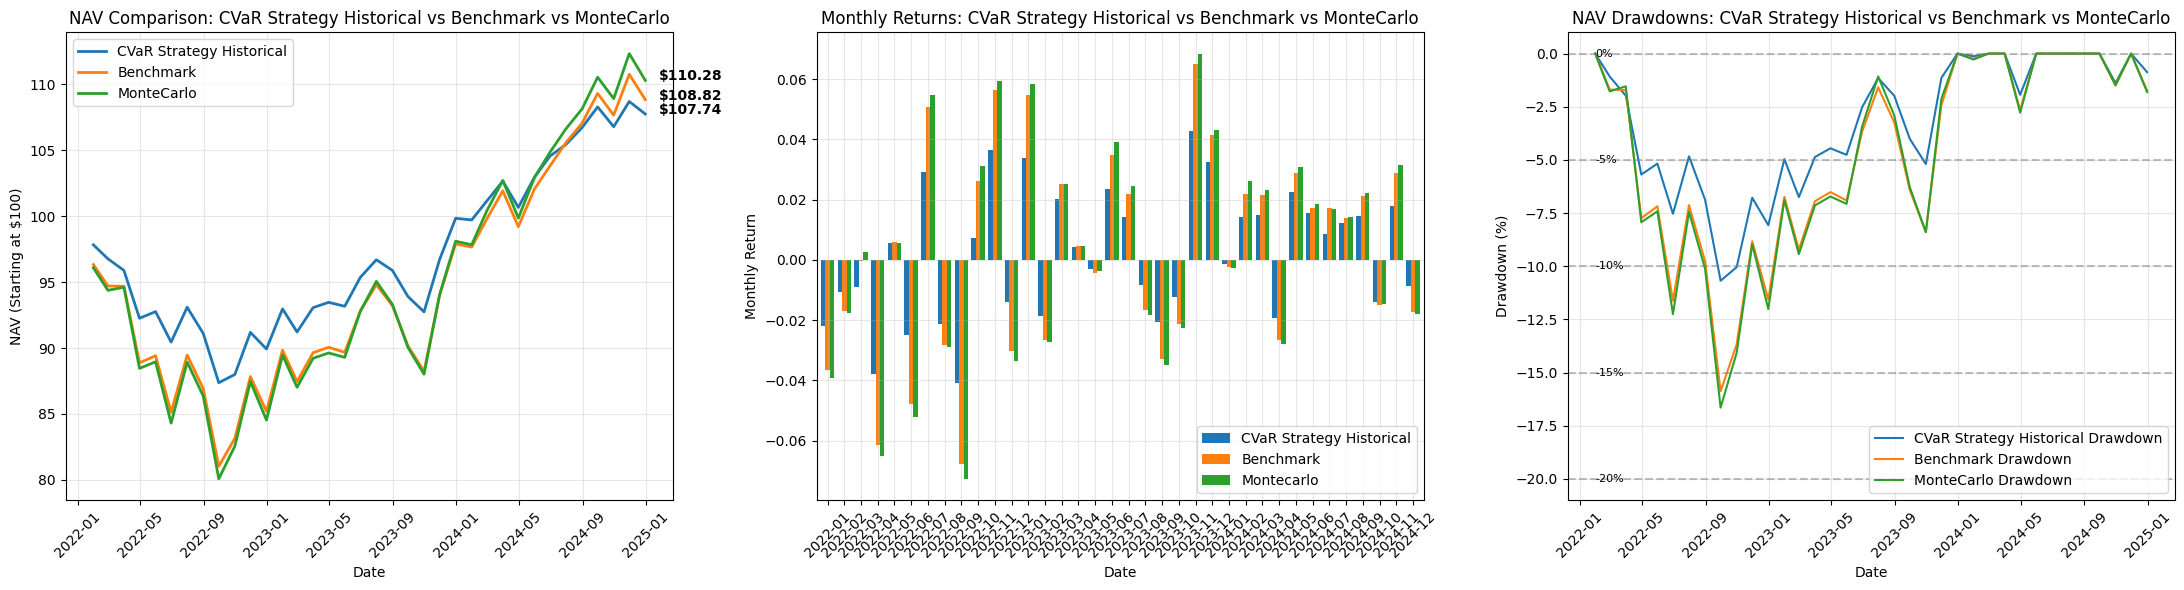

In [ ]:
# Create Dataframe of returns
performance_stats = pd.DataFrame({
    'CVaR Strategy Historical': [
        f"${returns_cvar['NAV'].iloc[-1]:.2f}",
        f"{(returns_cvar['NAV'].iloc[-1] / initial_nav - 1) * 100:.2f}%",
        f"{returns_cvar['Portfolio Return'].mean() * 100:.2f}%",
        f"{returns_cvar['Portfolio Return'].std() * 100:.2f}%",
        f"{(returns_cvar['Portfolio Return'].mean() / returns_cvar[returns_cvar['Portfolio Return'] < 0]['Portfolio Return'].std()):.4f}",
        f"{(returns_cvar['NAV'] / returns_cvar['NAV'].cummax() - 1).min() * 100:.2f}%"
    ],
    'Montecarlo Strategy': [
        f"${returns_mc['NAV'].iloc[-1]:.2f}",
        f"{(returns_mc['NAV'].iloc[-1] / initial_nav - 1) * 100:.2f}%",
        f"{returns_mc['Portfolio Return'].mean() * 100:.2f}%",
        f"{returns_mc['Portfolio Return'].std() * 100:.2f}%",
        f"{(returns_mc['Portfolio Return'].mean() / returns_mc[returns_mc['Portfolio Return'] < 0]['Portfolio Return'].std()):.4f}",
        f"{(returns_mc['NAV'] / returns_mc['NAV'].cummax() - 1).min() * 100:.2f}%"
    ],
    'Benchmark': [
        f"${returns_copy['NAV'].iloc[-1]:.2f}",
        f"{(returns_copy['NAV'].iloc[-1] / initial_nav - 1) * 100:.2f}%",
        f"{returns_copy['Portfolio Return'].mean() * 100:.2f}%",
        f"{returns_copy['Portfolio Return'].std() * 100:.2f}%",
        f"{(returns_copy['Portfolio Return'].mean() / returns_copy[returns_copy['Portfolio Return'] < 0]['Portfolio Return'].std()):.4f}",
        f"{(returns_copy['NAV'] / returns_copy['NAV'].cummax() - 1).min() * 100:.2f}%"
    ]
}, index=[
    'Final NAV',
    'Total Return',
    'Average Monthly Return',
    'Monthly Volatility',
    'Sortino Ratio (no rf)',
    'Maximum Drawdown'
])


common_index = returns_cvar.index

# Create comparison dataframe
returns_comparison = pd.DataFrame({
    'CVaR Strategy Historical': returns_cvar.loc[common_index, "Portfolio Return"],
    'Benchmark': returns_copy.loc[common_index, "Portfolio Return"],
    'Montecarlo': returns_mc.loc[common_index, "Portfolio Return"]
})

fig, axes = fig, axes = plt.subplots(ncols=3, figsize=(22, 6))
plt.subplots_adjust(wspace=0.4)
# Format x-axis to show only year and month
date_format = DateFormatter('%Y-%m')

# --- Plot 1: NAV Comparison ---
ax = axes[0]
ax.xaxis.set_major_formatter(date_format)

ax.plot(returns_cvar.index, returns_cvar["NAV"], label="CVaR Strategy Historical", linewidth=2)
ax.plot(returns_copy.index, returns_copy["NAV"], label="Benchmark", linewidth=2)
ax.plot(returns_mc.index, returns_mc["NAV"], label="MonteCarlo", linewidth=2)

ax.set_xlabel('Date')
ax.set_ylabel('NAV (Starting at $100)')
ax.set_title('NAV Comparison: CVaR Strategy Historical vs Benchmark vs MonteCarlo')
ax.legend()
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# Add NAV values at the end of each line
ax.annotate(f'${returns_cvar["NAV"].iloc[-1]:.2f}',
            xy=(returns_cvar.index[-1], returns_cvar["NAV"].iloc[-1]),
            xytext=(10, 0), textcoords='offset points', fontweight='bold')

ax.annotate(f'${returns_copy["NAV"].iloc[-1]:.2f}',
            xy=(returns_copy.index[-1], returns_copy["NAV"].iloc[-1]),
            xytext=(10, 0), textcoords='offset points', fontweight='bold')

ax.annotate(f'${returns_mc["NAV"].iloc[-1]:.2f}',
            xy=(returns_mc.index[-1], returns_mc["NAV"].iloc[-1]),
            xytext=(10, 0), textcoords='offset points', fontweight='bold')

# --- Plot 2: Monthly Returns Bar Chart ---
ax = axes[1]
returns_comparison.plot(kind='bar', ax=ax, width=0.8)

date_labels = [date.strftime('%Y-%m') for date in returns_comparison.index]
ax.set_xticklabels(date_labels)

ax.set_xlabel('Date')
ax.set_ylabel('Monthly Return')
ax.set_title('Monthly Returns: CVaR Strategy Historical vs Benchmark vs MonteCarlo')
ax.legend()
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# --- Plot 3: NAV Drawdowns ---
ax = axes[2]
for df, name in [(returns_cvar, "CVaR Strategy Historical"),
 (returns_copy, "Benchmark"), (returns_mc, "MonteCarlo")]:
    running_max = df["NAV"].cummax()
    drawdowns = df["NAV"] / running_max - 1
    ax.plot(df.index, drawdowns * 100, label=f"{name} Drawdown")

ax.set_xlabel('Date')
ax.set_ylabel('Drawdown (%)')
ax.set_title('NAV Drawdowns: CVaR Strategy Historical vs Benchmark vs MonteCarlo')
ax.legend()
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', rotation=45)

# Add horizontal lines for drawdown levels
for level in [0, -5, -10, -15, -20]:
    ax.axhline(y=level, color='gray', linestyle='--', alpha=0.5)
    ax.text(returns_copy.index[0], level, f'{level}%', va='center', ha='left', fontsize=8)

print("NAV Performance Metrics:")
display(performance_stats)

plt.tight_layout()
plt.show()

## Conclusions of first strategy

The current implementation shows that using the historical approach being better compared to montecarlo in term of risk management since it has a higher
sortino ratio ratio.

Interestingly the montecarlo perform better for profit, and is very similar to the benchmark, dfurthermore it reallocates the position only one time.

In our opinion these results defines that a measure with CVAR can effectively, if not reduce the profit, increase the posible profits obtained.

Maybe other configurations may results in better performances, but at the moment these are our best results so far.

# Second Strategy
We have implemented an alternative strategy where the algorithm optimizes returns while constraining the portfolio CVaR to a predetermined threshold—1.5% in this case. The benchmark and Monte Carlo data are carried over from our previous analysis.


Portfolio Analysis:
Total_Return: 9.48%
Annualized_Return: 75.82%
Annualized_Volatility: 0.42
Max_Drawdown: -13.49%
Max_Risk: 2.52%
Average_Risk: 1.53%
Risk_Violations: 100.00%
Average_Equity_Exposure: 30.50%
Average_Bond_Exposure: 44.62%
Average_Safety_Exposure: 24.89%

Final Portfolio Weights:
0
AGG     0.239
IEMG    0.091
IJH     0.054
IVV     0.078
IWF     0.074
LQD     0.212
SHV     0.252
Name: 2024-11-30 00:00:00, dtype: float64


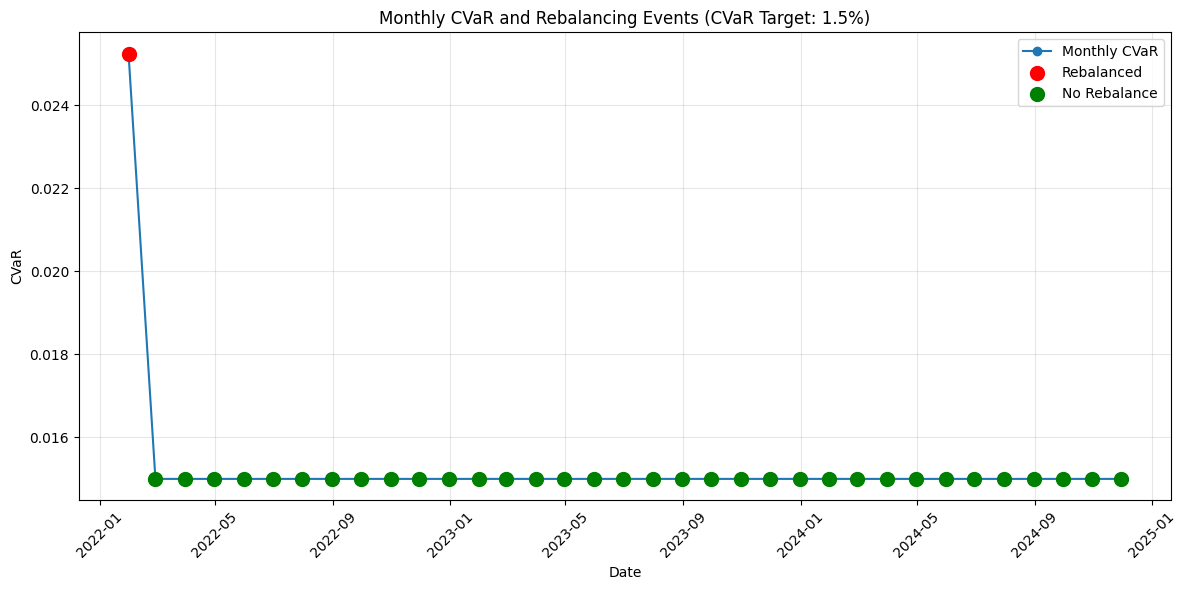

In [ ]:
class ETFPortfolioOptimizer:
    def __init__(self):
        # Define ETF categories for risk management
        self.etf_categories = {
            'equity': ['IEMG', 'IJH', 'IVV', 'IWF'],
            'bonds': ['AGG', 'LQD'],
            'safety': ['SHV']
        }

    def calculate_cvar(self, returns, weights, alpha=0.05):
        """Calculate CVaR using historical method"""
        portfolio_returns = returns.dot(weights)
        var = np.percentile(portfolio_returns, alpha * 100)
        cvar = portfolio_returns[portfolio_returns <= var].mean()
        return abs(cvar)

    def get_category_exposure(self, weights, tickers):
        """Calculate exposure to each asset category"""
        exposures = {}
        for category, etfs in self.etf_categories.items():
            category_weight = sum(weights[tickers.index(etf)] for etf in etfs if etf in tickers)
            exposures[category] = category_weight
        return exposures

    def rebalance_for_risk_compliance(self, returns, current_weights, tickers, risk_limit, alpha=0.05):
        """
        Rebalance portfolio when risk limit is violated, considering ETF characteristics.
        Se il CVaR corrente supera il limite, si cerca di ottimizzare la combinazione dei pesi
        per massimizzare il rendimento atteso, rispettando il vincolo sul CVaR e dei vincoli di
        allocazione per le diverse categorie.
        """
        current_cvar = self.calculate_cvar(returns, current_weights, alpha)

        if current_cvar <= risk_limit:
            return current_weights

        def objective(weights):
            # Massimizza il rendimento medio (minimizza il negativo)
            return -returns.mean().dot(weights)

        def risk_constraint(weights):
            # Il vincolo è soddisfatto se risk_limit - CVaR è >= 0
            return risk_limit - self.calculate_cvar(returns, weights, alpha)

        # Vincoli di base: somma dei pesi pari a 1 e rispetto del limite di CVaR
        constraints = [
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},  # weights sum to 1
            {'type': 'ineq', 'fun': risk_constraint}          # CVaR constraint
        ]

        # Vincoli per le categorie:
        def safety_constraint(weights):
            # Minima allocazione agli asset di sicurezza (SHV)
            safety_idx = tickers.index('SHV')
            return weights[safety_idx] - 0.05  # minimo 5%

        def equity_constraint(weights):
            # Limita l'esposizione alle equity durante periodi di alta volatilità/rischio
            equity_exposure = sum(weights[tickers.index(etf)]
                                  for etf in self.etf_categories['equity']
                                  if etf in tickers)
            return 0.60 - equity_exposure  # massimo 60% in equity

        constraints.extend([
            {'type': 'ineq', 'fun': safety_constraint},
            {'type': 'ineq', 'fun': equity_constraint}
        ])

        bounds = tuple((0, 1) for _ in range(len(current_weights)))

        try:
            result = minimize(
                objective,
                current_weights,
                method='SLSQP',
                bounds=bounds,
                constraints=constraints,
                options={'maxiter': 1000}
            )

            if result.success:
                return result.x
        except Exception as e:
            print("Optimization failed:", e)

        # Se l'ottimizzazione fallisce, utilizza una strategia di riduzione del rischio "di emergenza"
        return self.emergency_risk_reduction(returns, current_weights, tickers, risk_limit)

    def emergency_risk_reduction(self, returns, current_weights, tickers, risk_limit):
        """
        Emergency risk reduction strategy based on ETF characteristics.
        Riduce l'esposizione alle equity (in base alla volatilità) e aumenta quella alle obbligazioni e alla sicurezza.
        """
        new_weights = current_weights.copy()
        current_exposures = self.get_category_exposure(new_weights, tickers)

        # Calcola le volatilità storiche per ogni ETF
        vols = returns.std()

        # Riduzione dell'esposizione alle equity (maggiore riduzione per ETF con volatilità più alta)
        for etf in self.etf_categories['equity']:
            if etf in tickers:
                idx = tickers.index(etf)
                # Calcola il fattore di riduzione in relazione alla volatilità media delle equity
                reduction = vols[etf] / vols[self.etf_categories['equity']].mean()
                new_weights[idx] *= (1 - reduction * 0.3)  # riduzione massima del 30%

        # Aumenta l'allocazione agli asset di sicurezza
        safety_idx = tickers.index('SHV')
        new_weights[safety_idx] = max(0.1, new_weights[safety_idx])  # minimo 10% in sicurezza

        # Aumenta leggermente l'allocazione agli ETF obbligazionari
        for etf in self.etf_categories['bonds']:
            if etf in tickers:
                idx = tickers.index(etf)
                new_weights[idx] *= 1.2  # aumento del 20% per gli ETF obbligazionari

        # Normalizza i pesi affinché la somma sia pari a 1
        new_weights /= new_weights.sum()

        return new_weights

    def backtest_strategy(self, returns_train, returns_test, initial_weights,
                         risk_limit=0.015, rebalance_frequency='ME'):
        """
        Backtest della strategia con risk management specifico per ETF.
        Durante il backtest, se il CVaR (stimato sui dati di training) supera il limite,
        viene applicato un ribilanciamento e viene registrato un flag per quel mese.
        """
        portfolio_nav = 100
        portfolio_values = []
        weights_history = pd.DataFrame(columns=returns_train.columns)
        risk_history = []
        exposure_history = []
        rebalanced_history = []  # Flag per indicare se è stato fatto un ribilanciamento

        dates_monthly = pd.date_range(
            start=returns_test.index[0],
            end=returns_test.index[-1],
            freq=rebalance_frequency
        )

        current_weights = initial_weights
        tickers = list(returns_train.columns)

        for i, month_end in enumerate(dates_monthly):
            if i == 0:
                month_start = returns_test.index[0]
            else:
                month_start = dates_monthly[i-1] + pd.Timedelta(days=1)

            mask = (returns_test.index >= month_start) & (returns_test.index <= month_end)
            month_returns = returns_test.loc[mask]

            if len(month_returns) == 0:
                portfolio_values.append(portfolio_nav)
                rebalanced_history.append(False)
                continue

            current_cvar = self.calculate_cvar(returns_train, current_weights)
            current_exposures = self.get_category_exposure(current_weights, tickers)

            # Controlla se il limite di rischio è violato
            if current_cvar > risk_limit:
                # print(f"\nRisk limit violated at {month_end.date()}")
                # print(f"Current CVaR: {current_cvar:.2%}")
                # print("Current exposures:", {k: f"{v:.1%}" for k, v in current_exposures.items()})

                current_weights = self.rebalance_for_risk_compliance(
                    returns_train,
                    current_weights,
                    tickers,
                    risk_limit
                )

                new_cvar = self.calculate_cvar(returns_train, current_weights)
                new_exposures = self.get_category_exposure(current_weights, tickers)
                # print(f"New CVaR: {new_cvar:.2%}")
                # print("New exposures:", {k: f"{v:.1%}" for k, v in new_exposures.items()})
                rebalanced = True
            else:
                rebalanced = False

            rebalanced_history.append(rebalanced)

            # --- Aggiunta stampa mensile (tipo foto) ---
            # print(f"\nMonth ending {month_end.date()}")
            # print(f"CVaR: {current_cvar:.2%}")
            # print("Exposures:", {k: f"{v:.1%}" for k, v in current_exposures.items()})
            # print(f"Weights: {current_weights.round(2)}")

            # Calcola il rendimento mensile e aggiorna il NAV
            portfolio_returns = month_returns.dot(current_weights)
            portfolio_nav *= (1 + portfolio_returns).prod()

            portfolio_values.append(portfolio_nav)
            weights_history.loc[month_end] = current_weights
            risk_history.append(current_cvar)
            exposure_history.append(current_exposures)

        results = pd.DataFrame({
            'Portfolio_NAV': portfolio_values,
            'Portfolio_Risk': risk_history
        }, index=dates_monthly)

        exposures_df = pd.DataFrame(exposure_history, index=dates_monthly)

        return results, weights_history, exposures_df, rebalanced_history

    def analyze_results(self, results, weights_history, exposures_df):
        """
        Analizza i risultati del backtest fornendo alcune metriche di performance.
        """
        portfolio_returns = results['Portfolio_NAV'].pct_change().dropna()

        analysis = {
            'Total_Return': (results['Portfolio_NAV'].iloc[-1] / results['Portfolio_NAV'].iloc[0] - 1),
            'Annualized_Return': portfolio_returns.mean() * 252,
            'Annualized_Volatility': portfolio_returns.std() * np.sqrt(252),
            'Max_Drawdown': (results['Portfolio_NAV'] / results['Portfolio_NAV'].cummax() - 1).min(),
            'Max_Risk': results['Portfolio_Risk'].max(),
            'Average_Risk': results['Portfolio_Risk'].mean(),
            'Risk_Violations': (results['Portfolio_Risk'] > 0.015).sum(),
            'Average_Equity_Exposure': exposures_df['equity'].mean(),
            'Average_Bond_Exposure': exposures_df['bonds'].mean(),
            'Average_Safety_Exposure': exposures_df['safety'].mean()
        }

        print("\nPortfolio Analysis:")
        for metric, value in analysis.items():
            if any(x in metric for x in ['Risk', 'Return', 'Exposure', 'Drawdown']):
                print(f"{metric}: {value:.2%}")
            else:
                print(f"{metric}: {value:.2f}")

        print("\nFinal Portfolio Weights:")
        print(weights_history.iloc[-1].round(3))

        return pd.Series(analysis)


# Esempio di utilizzo
optimizer = ETFPortfolioOptimizer()

# Inizialmente pesi uguali per 7 ETF
initial_weights = np.array([1/7] * 7)

df_returns_train = returns.loc["2020-01-01":"2021-12-31"]
df_returns_test = returns.loc["2022-01-01":"2024-12-31"]

# Esegui il backtest con limite CVaR pari all'1,5%
results, weights_history, exposures_df, rebalanced_history = optimizer.backtest_strategy(
    df_returns_train,
    df_returns_test,
    initial_weights,
    risk_limit=0.015  # CVaR target al 1,5%
)

# Analizza i risultati
analysis = optimizer.analyze_results(results, weights_history, exposures_df)

# Plot mensile: Andamento del CVaR e indicazione dei mesi in cui è avvenuto il ribilanciamento
dates = results.index
risk_values = results['Portfolio_Risk']

# Separa i mesi con ribilanciamento da quelli senza
dates_reb = [d for d, flag in zip(dates, rebalanced_history) if flag]
risk_reb = [r for r, flag in zip(risk_values, rebalanced_history) if flag]

dates_no_reb = [d for d, flag in zip(dates, rebalanced_history) if not flag]
risk_no_reb = [r for r, flag in zip(risk_values, rebalanced_history) if not flag]

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates, risk_values, label="Monthly CVaR", marker='o', linestyle='-')
ax.scatter(dates_reb, risk_reb, color='red', s=100, label='Rebalanced', zorder=5)
ax.scatter(dates_no_reb, risk_no_reb, color='green', s=100, label='No Rebalance', zorder=5)
ax.set_title("Monthly CVaR and Rebalancing Events (CVaR Target: 1.5%)")
ax.set_xlabel("Date")
ax.set_ylabel("CVaR")
ax.legend()
ax.grid(True, alpha=0.3)

# Formatta l'asse x per mostrare anno e mese
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calcola il rendimento cumulativo del portafoglio
portfolio_cum_ret = results["Portfolio_NAV"] / results["Portfolio_NAV"].iloc[0] - 1

As we can see from the chart, only one rebalancing occurred in February 2022, when the CVaR reached 2.48%. The algorithm adjusted the initial allocation from 50% equity, 30% bonds, and 20% safety to 29.7% equity, 45.1% bonds, and 25.2% safety. After this rebalancing, no further adjustments were necessary since the portfolio remained within the prescribed risk threshold.

NAV Performance Metrics:


,CVaR Strategy Historical Threshold,Benchmark
Final NAV,$106.48,$108.82
Total Return,6.48%,8.82%
Average Monthly Return,0.30%,0.29%
Monthly Volatility,2.66%,3.34%
Sortino Ratio (no rf),0.2091,0.1529
Maximum Drawdown,-13.49%,-15.88%


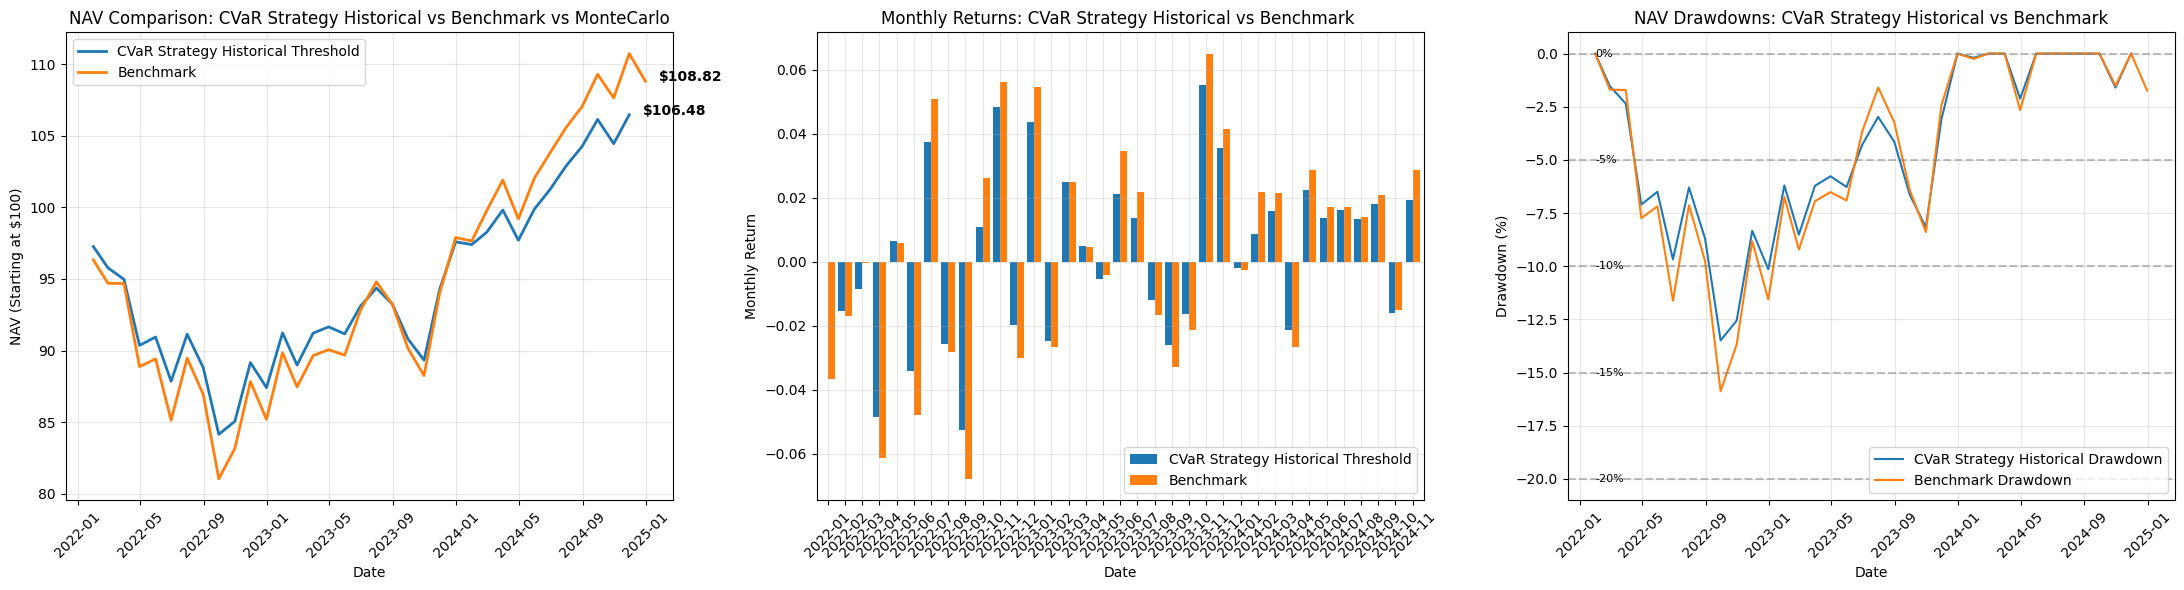

In [ ]:
# --- Preparazione dei dati per la strategia CVaR ---
# Creiamo una copia del DataFrame dei risultati e rinominiamo la colonna 'Portfolio_NAV' in 'NAV'
returns_cvar = results.copy().rename(columns={"Portfolio_NAV": "NAV"})
# Calcoliamo il rendimento mensile per la strategia CVaR
returns_cvar["Portfolio Return"] = returns_cvar["NAV"].pct_change()

# Per MonteCarlo e Benchmark assumiamo che i DataFrame returns_mc e returns_copy
# contengano già le colonne "NAV" e "Portfolio Return" (quindi non vengono modificati)

performance_stats = pd.DataFrame({
    'CVaR Strategy Historical Threshold': [
        f"${returns_cvar['NAV'].iloc[-1]:.2f}",
        f"{(returns_cvar['NAV'].iloc[-1] / initial_nav - 1) * 100:.2f}%",
        f"{returns_cvar['Portfolio Return'].mean() * 100:.2f}%",
        f"{returns_cvar['Portfolio Return'].std() * 100:.2f}%",
        f"{(returns_cvar['Portfolio Return'].mean() / returns_cvar[returns_cvar['Portfolio Return'] < 0]['Portfolio Return'].std()):.4f}",
        f"{(returns_cvar['NAV'] / returns_cvar['NAV'].cummax() - 1).min() * 100:.2f}%"
    ],
    'Benchmark': [
        f"${returns_copy['NAV'].iloc[-1]:.2f}",
        f"{(returns_copy['NAV'].iloc[-1] / initial_nav - 1) * 100:.2f}%",
        f"{returns_copy['Portfolio Return'].mean() * 100:.2f}%",
        f"{returns_copy['Portfolio Return'].std() * 100:.2f}%",
        f"{(returns_copy['Portfolio Return'].mean() / returns_copy[returns_copy['Portfolio Return'] < 0]['Portfolio Return'].std()):.4f}",
        f"{(returns_copy['NAV'] / returns_copy['NAV'].cummax() - 1).min() * 100:.2f}%"
    ]
}, index=[
    'Final NAV',
    'Total Return',
    'Average Monthly Return',
    'Monthly Volatility',
    'Sortino Ratio (no rf)',
    'Maximum Drawdown'
])

common_index = returns_cvar.index

# --- Creazione del DataFrame per il confronto dei rendimenti mensili ---
returns_comparison = pd.DataFrame({
    'CVaR Strategy Historical Threshold': returns_cvar.loc[common_index, "Portfolio Return"],
    'Benchmark': returns_copy.loc[common_index, "Portfolio Return"],

})

# --- Creazione dei plot ---
fig, axes = plt.subplots(ncols=3, figsize=(22, 6))
plt.subplots_adjust(wspace=0.4)
date_format = DateFormatter('%Y-%m')

# Plot 1: Confronto del NAV
ax = axes[0]
ax.xaxis.set_major_formatter(date_format)

ax.plot(returns_cvar.index, returns_cvar["NAV"], label="CVaR Strategy Historical Threshold", linewidth=2)
ax.plot(returns_copy.index, returns_copy["NAV"], label="Benchmark", linewidth=2)


ax.set_xlabel('Date')
ax.set_ylabel('NAV (Starting at $100)')
ax.set_title('NAV Comparison: CVaR Strategy Historical vs Benchmark vs MonteCarlo')
ax.legend()
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# Aggiunge i valori finali del NAV come annotazioni
ax.annotate(f'${returns_cvar["NAV"].iloc[-1]:.2f}',
            xy=(returns_cvar.index[-1], returns_cvar["NAV"].iloc[-1]),
            xytext=(10, 0), textcoords='offset points', fontweight='bold')
ax.annotate(f'${returns_copy["NAV"].iloc[-1]:.2f}',
            xy=(returns_copy.index[-1], returns_copy["NAV"].iloc[-1]),
            xytext=(10, 0), textcoords='offset points', fontweight='bold')


# Plot 2: Grafico a barre dei rendimenti mensili
ax = axes[1]
returns_comparison.plot(kind='bar', ax=ax, width=0.8)

date_labels = [date.strftime('%Y-%m') for date in returns_comparison.index]
ax.set_xticklabels(date_labels)

ax.set_xlabel('Date')
ax.set_ylabel('Monthly Return')
ax.set_title('Monthly Returns: CVaR Strategy Historical vs Benchmark ')
ax.legend()
ax.grid(True, alpha=0.3)
ax.tick_params(axis='x', rotation=45)

# Plot 3: Drawdown del NAV
ax = axes[2]
for df, name in [(returns_cvar, "CVaR Strategy Historical"),
                 (returns_copy, "Benchmark")]:
    running_max = df["NAV"].cummax()
    drawdowns = df["NAV"] / running_max - 1
    ax.plot(df.index, drawdowns * 100, label=f"{name} Drawdown")

ax.set_xlabel('Date')
ax.set_ylabel('Drawdown (%)')
ax.set_title('NAV Drawdowns: CVaR Strategy Historical vs Benchmark')
ax.legend()
ax.grid(True, alpha=0.3)
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', rotation=45)

# Aggiunge linee orizzontali per livelli di drawdown
for level in [0, -5, -10, -15, -20]:
    ax.axhline(y=level, color='gray', linestyle='--', alpha=0.5)
    ax.text(returns_copy.index[0], level, f'{level}%', va='center', ha='left', fontsize=8)

print("NAV Performance Metrics:")
display(performance_stats)

plt.tight_layout()
plt.show()

## Conclusion on the second strategy and final considerations

In conclusion, we can see that the second strategy produced a satisfactory outcome. Although both strategies exhibited very similar performance, the first strategy outperformed in terms of risk and return.
The reasons for why this happens are the following:

- the function tries to maximize return
- The CVAR is always kept at a specific threshold in order to minimize potential risk.

This provides different weights since it is not flexible compared to the other strategy and is not accounting from potential loss deviations.

For this reason we showed that a simple approach such this reduce the risk but it is incapable to adapt to turbulent imes compared to the other.

